Iteration for euclidean: 46
Iteration for cosine: 20
Iteration for jaccard: 2


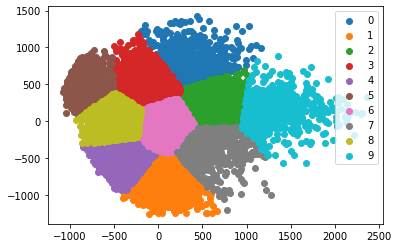

In [65]:

#Loading the required modules
 
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
 
def calculate_sse(cluster, distance):
    sum = 0
    j=0
    for i in cluster:
       distance_centroid_position = distance[j][i]
       j += 1
       sum += distance_centroid_position**2
    return sum

def kmeans(data, k, no_of_iterations, distance_metric):
    '''
    k-means implementation from scratch. 
    '''
    index = np.random.choice(len(data), k, replace=False)
    #Randomly choosing Centroids 
    centroids = data[index, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(data, centroids, distance_metric) #Step 2
     
    #Centroid with the minimum Distance
    cluster = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    i = 0
    centroid_shift = True
    sse_increase = False
    tmp_centroids = []
    tmp_sse = 9999999999
    while i < no_of_iterations and centroid_shift and not sse_increase:
        centroids = []
        for index in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = data[cluster==index].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
        
        if all(elem in tmp_centroids for elem in centroids):
            centroid_shift = False
        tmp_centroids = centroids

        distances = cdist(data, centroids , distance_metric)
        cluster = np.array([np.argmin(i) for i in distances])
        sse = calculate_sse(cluster, distances)
        if sse > tmp_sse:
            sse_increase = True
        tmp_sse = sse
        i += 1

    sse = calculate_sse(cluster, distances)
    #print(f"SSE for {distance_metric}: {sse}")
    print(f"Iteration for {distance_metric}: {i}")
    return cluster 

 
#Load Data
data = pd.read_csv("dataset/data.csv")
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)

label = kmeans(df,10,500, "euclidean")
label2 = kmeans(df,10,500, "cosine")
label3 = kmeans(df,10,500, "jaccard")
# Visualize the results
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

Max iteration (100) SSE for euclidean: 661586539.2647787
Iteration: 100
Max iteration (100) SSE for cosine: 5.02919006363433
Iteration: 100
Max iteration (100) SSE for jaccard: 9990.0
Iteration: 100


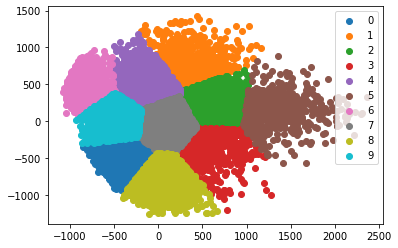

In [74]:

#Loading the required modules
 
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
 
def calculate_sse(cluster, distance):
    sum = 0
    j=0
    for i in cluster:
       distance_centroid_position = distance[j][i]
       j += 1
       sum += distance_centroid_position**2
    return sum

def kmeans(data, k, no_of_iterations, distance_metric):
    '''
    k-means implementation from scratch. 
    '''
    index = np.random.choice(len(data), k, replace=False)
    #Randomly choosing Centroids 
    centroids = data[index, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(data, centroids, distance_metric) #Step 2
     
    #Centroid with the minimum Distance
    cluster = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    i = 0
    centroid_shift = True
    sse_increase = False
    tmp_centroids = []
    tmp_sse = 9999999999
    while i < no_of_iterations:
        centroids = []
        for index in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = data[cluster==index].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
        
        if all(elem in tmp_centroids for elem in centroids):
            centroid_shift = False
        tmp_centroids = centroids

        distances = cdist(data, centroids , distance_metric)
        cluster = np.array([np.argmin(i) for i in distances])
        sse = calculate_sse(cluster, distances)
        if sse >= tmp_sse:
            sse_increase = True
        tmp_sse = sse
        i += 1

    sse = calculate_sse(cluster, distances)
    print(f"Max iteration (100) SSE for {distance_metric}: {sse}")
    print(f"Iteration: {i}")
    return cluster 

 
#Load Data
data = pd.read_csv("dataset/data.csv")
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)

label = kmeans(df,10,100, "euclidean")
label2 = kmeans(df,10,100, "cosine")
label3 = kmeans(df,10,100, "jaccard")
# Visualize the results
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()